In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

Student Performance Analytics Dashboard

Problem Statement:

Institutions need early warnings for students who might fail or
drop out.

Objective:

Analyze student data to highlight performance trends and risk
areas.

Requirements:

Dataset: marks, attendance, logins

Calculate averages, correlation, and absentee impact

Visualize top vs struggling students

Use bar charts, heatmaps

Expected Outcome:

Dashboard to support academic interventions for at-risk
students.

In [3]:
df.columns.tolist()

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
top_students = df.nlargest(10, 'Exam_Score')
struggling_students = df.nsmallest(10, 'Exam_Score')
struggling_students

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Risk_Level
1101,3,62,Medium,Low,No,6,67,Medium,Yes,1,...,Medium,Public,Negative,3,No,High School,Near,Male,55,Moderate Risk
5507,5,65,Low,High,No,7,71,Medium,Yes,0,...,Medium,Private,Negative,2,No,College,Far,Male,56,Moderate Risk
2880,7,66,High,Low,Yes,8,68,High,Yes,0,...,Medium,Public,Negative,2,Yes,College,Moderate,Male,57,Moderate Risk
3543,14,67,Low,Low,Yes,7,66,Low,Yes,0,...,Medium,Public,Neutral,4,No,High School,Far,Female,57,Moderate Risk
5719,9,64,Medium,Low,Yes,10,68,Low,Yes,0,...,Medium,Private,Negative,3,No,High School,Near,Male,57,Moderate Risk
5907,3,60,Medium,Low,Yes,6,78,Low,Yes,1,...,Medium,Public,Positive,1,No,Postgraduate,Near,Female,57,Moderate Risk
668,4,69,Medium,Low,No,9,93,Low,No,2,...,High,Private,Negative,3,No,High School,Moderate,Female,58,Moderate Risk
1210,13,61,High,Low,No,7,68,Low,No,1,...,Medium,Public,Neutral,2,No,High School,Near,Male,58,Moderate Risk
1750,4,61,Low,High,Yes,7,71,High,Yes,0,...,Low,Public,Positive,1,No,Postgraduate,Near,Male,58,Moderate Risk
2533,14,61,Medium,Medium,No,5,82,Low,No,0,...,Medium,Public,Neutral,0,No,High School,Near,Female,58,Moderate Risk


In [6]:
def risk_level(score):
    if score < 40:
        return 'High Risk'
    elif score < 60:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['Risk_Level'] = df['Exam_Score'].apply(risk_level)

In [11]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

<Axes: >

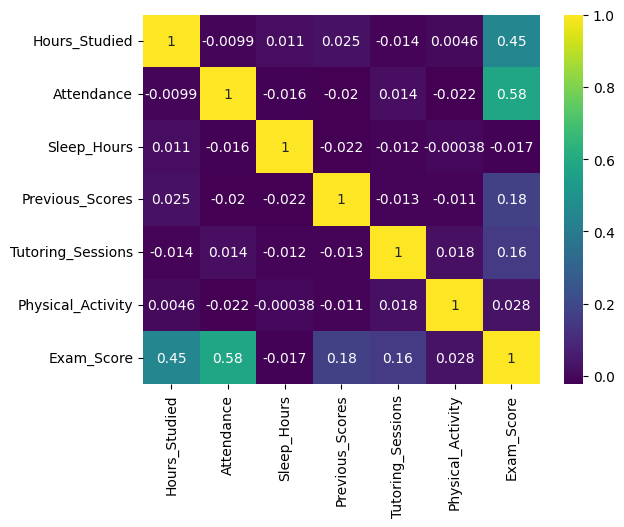

In [14]:
df_numeric = df.select_dtypes(include='number')
sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis')

## 📊 Student Performance Dashboard

This dashboard highlights trends and risk areas in student performance to support academic interventions.

### 📌 Summary Statistics

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### 🎯 Exam Score Distribution

### ⏱️ Hours Studied vs Exam Score

### 🔥 Feature Correlation Heatmap

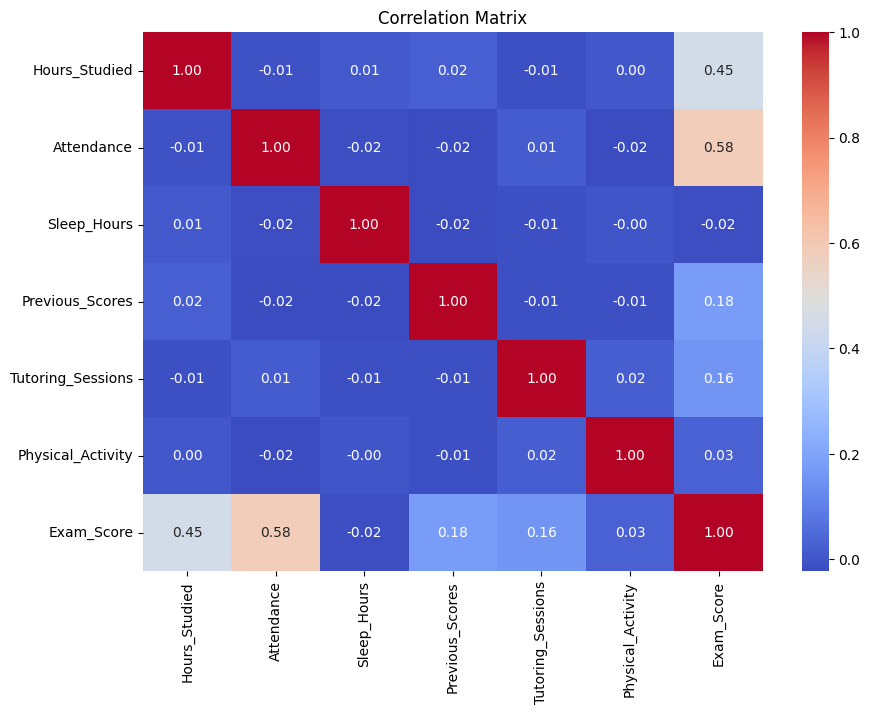

### 🏅 Top vs Struggling Students

### 📅 Attendance vs Exam Score

In [18]:
import plotly.express as px
from IPython.display import display, Markdown

def risk_label(score):
    if score < 40:
        return 'High Risk'
    elif score < 60:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['Risk_Level'] = df['Exam_Score'].apply(risk_label)

display(Markdown("## 📊 Student Performance Dashboard"))
display(Markdown("This dashboard highlights trends and risk areas in student performance to support academic interventions."))

display(Markdown("### 📌 Summary Statistics"))
display(df.describe())

display(Markdown("### 🎯 Exam Score Distribution"))
fig1 = px.histogram(df, x="Exam_Score", nbins=20, color="Risk_Level", title="Distribution of Exam Scores")
fig1.show()

display(Markdown("### ⏱️ Hours Studied vs Exam Score"))
fig2 = px.scatter(df, x="Hours_Studied", y="Exam_Score", color="Risk_Level", trendline="ols",
                  title="Impact of Study Hours on Exam Score")
fig2.show()

display(Markdown("### 🔥 Feature Correlation Heatmap"))
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

display(Markdown("### 🏅 Top vs Struggling Students"))
top5 = df.nlargest(5, "Exam_Score")
low5 = df.nsmallest(5, "Exam_Score")

fig3 = px.bar(top5, x="Exam_Score", y=top5.index, orientation="h", title="Top 5 Students", color="Exam_Score", color_continuous_scale='Blues')
fig4 = px.bar(low5, x="Exam_Score", y=low5.index, orientation="h", title="Bottom 5 Students", color="Exam_Score", color_continuous_scale='Reds')

fig3.show()
fig4.show()

display(Markdown("### 📅 Attendance vs Exam Score"))
fig5 = px.scatter(df, x="Attendance", y="Exam_Score", color="Risk_Level", trendline="ols", title="Attendance Impact on Score")
fig5.show()